In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

### Load Dataset

In [3]:
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


### Split the data into training and test sets

In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

### Define class to set Training set and Test set.

### Plot the result.

In [7]:
class lag_data():
    def __init__(self,lag):
        self.lag=lag
        self.sc = MinMaxScaler(feature_range = (0, 1))
        
    def train_set(self):
        # Feature Scaling
        training_set_scaled = self.sc.fit_transform(training_set)
        X_train = []
        y_train = []
        for i in range(60+self.lag-1, 800):
            X_train.append(training_set_scaled[i-60-self.lag+1:i-self.lag+1, 0])
            y_train.append(training_set_scaled[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        return X_train, y_train
    
    def test_set(self):
        dataset_train = df.iloc[:800, 1:2]
        self.dataset_test = df.iloc[800:, 1:2]
        dataset_total = pd.concat((dataset_train, self.dataset_test), axis = 0)
        inputs = dataset_total[len(dataset_total) - len(self.dataset_test) - 60:].values
        inputs = inputs.reshape(-1,1)
        inputs = self.sc.transform(inputs)
        X_test = []
        for i in range(60+self.lag-1, 519):
            X_test.append(inputs[i-60-self.lag+1:i-self.lag+1, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        self.X_test=X_test
        return X_test
    
    def plot(self,model):
        self.predicted_stock_price = model.predict(self.X_test)
        self.predicted_stock_price = self.sc.inverse_transform(self.predicted_stock_price)
        plt.plot(df.loc[800+self.lag-1:, 'Date'],self.dataset_test.values[self.lag-1:], color = 'red', label = 'Real TESLA Stock Price')
        plt.plot(self.predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
        plt.xticks(np.arange(0,453,50))
        plt.title('TESLA Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('TESLA Stock Price')
        plt.legend()
        plt.show()
        return self.predicted_stock_price
    

### Define Model and train it.

Model 1: lag=1 & 4 hidden layers

In [9]:
data1=lag_data(1)
X_train, y_train=data1.train_set()
X_test=data1.test_set()


In [10]:
model1 = Sequential()
model1.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units = 128, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units = 128, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units = 64))
model1.add(Dropout(0.2))
model1.add(Dense(units = 1))
optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
)
model1.compile(optimizer = optimizer, loss = 'mean_squared_error')

model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 17ms/step - loss: 0.0408
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0141
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0123
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0113
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0099
Epoch 13/100
24/24 [=====

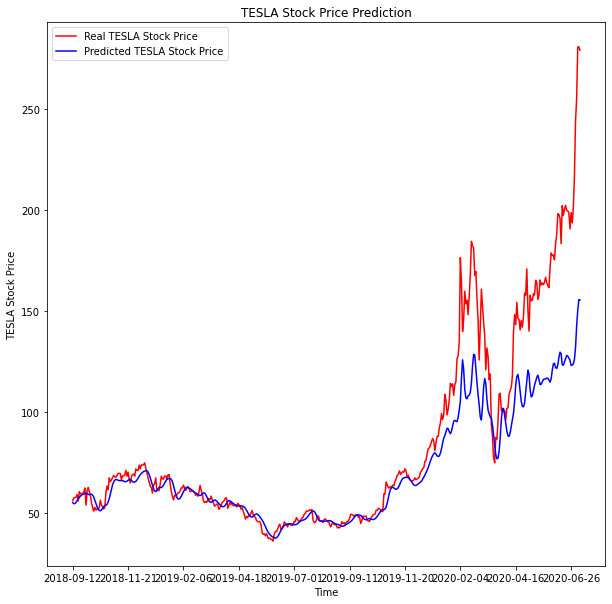

In [13]:
curve1=data1.plot(model1)

Model 2: 6 hidden layers with lag=1

In [15]:
data1=lag_data(1)
X_train, y_train=data1.train_set()
X_test=data1.test_set()

In [16]:
model2 = Sequential()
model2.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 128, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 128, return_sequences = True))
model2.add(Dropout(0.2))
model2.add(LSTM(units = 64, return_sequences = True))
model2.add(LSTM(units = 64, return_sequences = True))
model2.add(LSTM(units = 64))
model2.add(Dropout(0.2))
model2.add(Dense(units = 1))
model2.compile(optimizer = 'Adamax', loss = 'mean_squared_error')

model2.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
24/24 [==============================] - 6s 27ms/step - loss: 0.0687
Epoch 2/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0207
Epoch 3/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0173
Epoch 4/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0150
Epoch 5/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0158
Epoch 6/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0144
Epoch 7/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0140
Epoch 8/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0136
Epoch 9/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0151
Epoch 10/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0145
Epoch 11/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0133
Epoch 12/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0135
Epoch 13/200
24/24 [=====

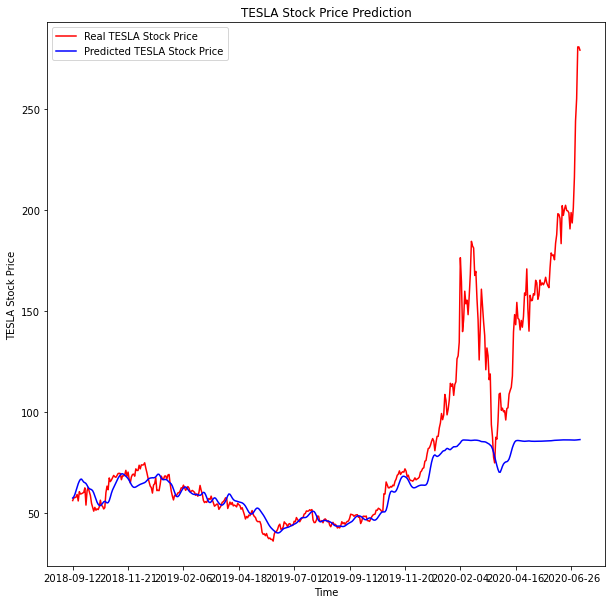

In [17]:
curve2=data1.plot(model2)

Model5:4 hidden layers with lag=7

In [18]:
data3=lag_data(7)
X_train, y_train=data3.train_set()
X_test=data3.test_set()

In [19]:
model5 = Sequential()
model5.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model5.add(Dropout(0.2))
model5.add(LSTM(units = 128, return_sequences = True))
model5.add(Dropout(0.2))
model5.add(LSTM(units = 128, return_sequences = True))
model5.add(Dropout(0))
model5.add(LSTM(units = 64))
model5.add(Dropout(0))
model5.add(Dense(units = 1))
model5.compile(optimizer = 'Adam', loss = 'mean_squared_error')

model5.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 4s 16ms/step - loss: 0.0587
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0158
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 6/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0137
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0119
Epoch 8/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0119
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0115
Epoch 10/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0109
Epoch 11/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0121
Epoch 12/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0108
Epoch 13/100
23/23 [=====

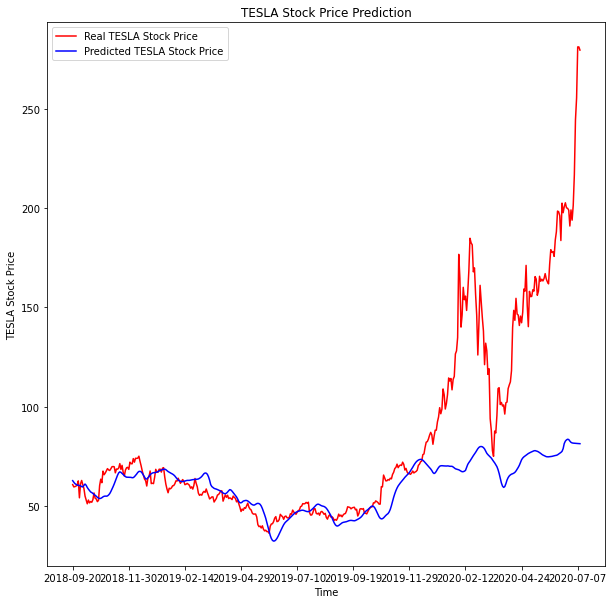

In [20]:
curve3=data3.plot(model5)

Model6: 6 hidden layers with lag=7

In [21]:
data3=lag_data(7)
X_train, y_train=data3.train_set()
X_test=data3.test_set()

In [22]:
model6 = Sequential()
model6.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model6.add(Dropout(0.2))
model6.add(LSTM(units = 128, return_sequences = True))
model6.add(Dropout(0.2))
model6.add(LSTM(units = 128, return_sequences = True))
model6.add(Dropout(0))
model6.add(LSTM(units = 64))
model6.add(Dropout(0))
model6.add(Dense(units = 1))
model6.compile(optimizer = 'Adam', loss = 'mean_squared_error')

model6.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 4s 19ms/step - loss: 0.0468
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0131
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0121
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0117
Epoch 6/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0123
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0119
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 9/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0112
Epoch 10/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 12/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0113
Epoch 13/100
23/23 [=====

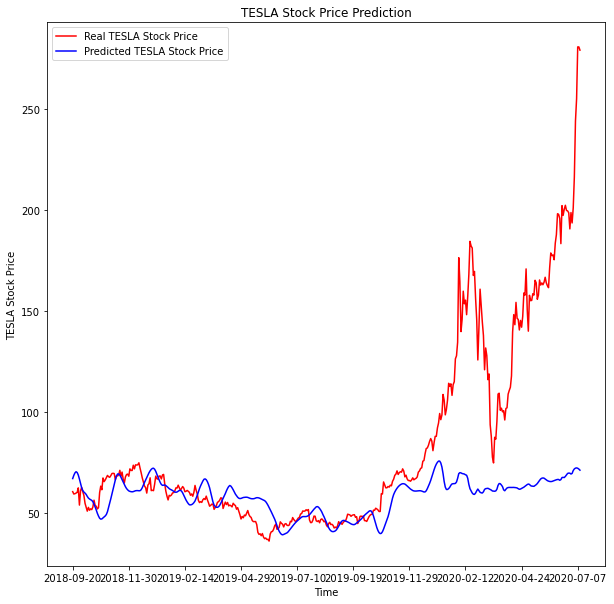

In [23]:
curve4=data3.plot(model6)

Model 3: 4 hidden layers with lag=14

In [25]:
data2=lag_data(14)
X_train, y_train=data2.train_set()
X_test=data2.test_set()

In [26]:
model3 = Sequential()
model3.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units = 128, return_sequences = True))
model3.add(Dropout(0.2))
model3.add(LSTM(units = 128, return_sequences = True))
model3.add(Dropout(0))
model3.add(LSTM(units = 64))
model3.add(Dropout(0))
model3.add(Dense(units = 1))
model3.compile(optimizer = 'Adam', loss = 'mean_squared_error')

model3.fit(X_train, y_train, epochs = 400, batch_size = 32)

Epoch 1/400
23/23 [==============================] - 4s 17ms/step - loss: 0.0600
Epoch 2/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 3/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0162
Epoch 4/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 5/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 6/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 7/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 8/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0160
Epoch 9/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0163
Epoch 10/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0148
Epoch 11/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 12/400
23/23 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 13/400
23/23 [=====

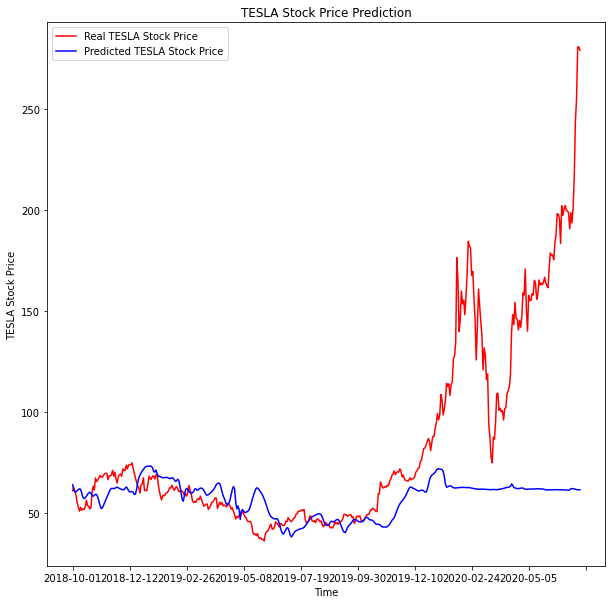

In [27]:
curve5=data2.plot(model3)

Model 4: 6 hidden layers with lag=14

In [28]:
X_train, y_train=data2.train_set()
X_test=data2.test_set()

In [30]:
model4 = Sequential()
model4.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model4.add(Dropout(0.2))
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(Dropout(0.2))
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(Dropout(0))
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(LSTM(units = 128, return_sequences = True))
model4.add(LSTM(units = 64))
model4.add(Dropout(0))
model4.add(Dense(units = 1))
model4.compile(optimizer = 'Adam', loss = 'mean_squared_error')

model4.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
23/23 [==============================] - 5s 25ms/step - loss: 0.0836
Epoch 2/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0231
Epoch 3/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0177
Epoch 4/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0174
Epoch 5/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0163
Epoch 6/200
23/23 [==============================] - 0s 19ms/step - loss: 0.0172
Epoch 7/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0176
Epoch 8/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0164
Epoch 9/200
23/23 [==============================] - 0s 19ms/step - loss: 0.0168
Epoch 10/200
23/23 [==============================] - 0s 18ms/step - loss: 0.0157
Epoch 11/200
23/23 [==============================] - 0s 19ms/step - loss: 0.0150
Epoch 12/200
23/23 [==============================] - 0s 19ms/step - loss: 0.0142
Epoch 13/200
23/23 [=====

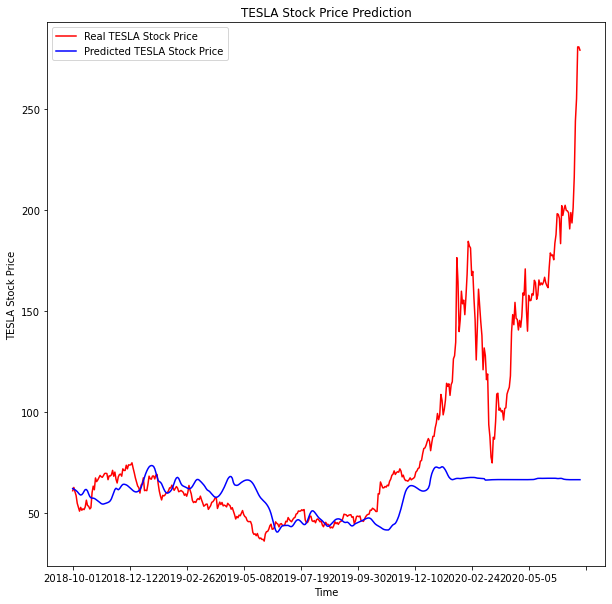

In [31]:
curve6=data2.plot(model4)

## Comparison

We can find that the more lag we use, the prediction will become much worse. The model 1 get the best result.

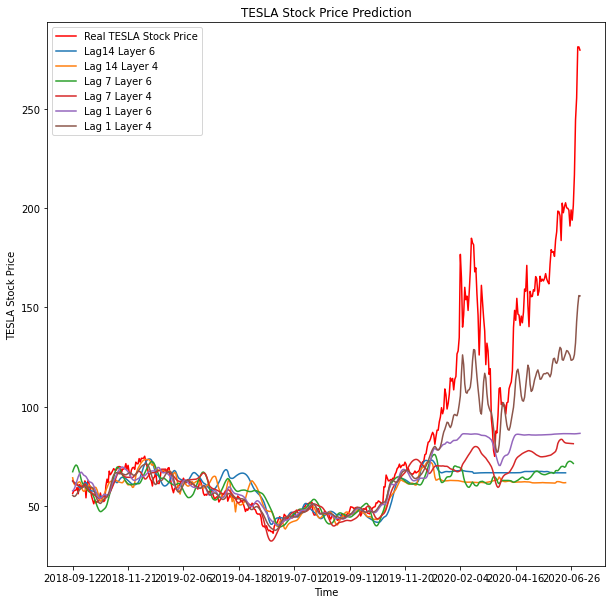

In [39]:
plt.plot(df.loc[800:, 'Date'],data2.dataset_test.values[:], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(curve6, label = 'Lag14 Layer 6')
plt.plot(curve5, label = 'Lag 14 Layer 4')
plt.plot(curve4, label = 'Lag 7 Layer 6')
plt.plot(curve3, label = 'Lag 7 Layer 4')
plt.plot(curve2, label = 'Lag 1 Layer 6')
plt.plot(curve1, label = 'Lag 1 Layer 4')
plt.xticks(np.arange(0,453,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Prediction

### Use model3 to predict furture 14 days, untal Oct 2020.

Totally, 12 weeks, so we need to repeatly predict 14 days for 6 times. And I also use Lag 7 model to make prediction for 1 week, and repeat it until 2020 Oct

In [42]:
sc = MinMaxScaler(feature_range = (0, 1))

In [43]:
all_test=data2.dataset_test.values
all_test_fit=sc.fit_transform(all_test)

In [51]:
#result=[]
for k in range(6):
    pred_data=[]
    for i in range(14):
        pred_data.append(all_test_fit[len(all_test_fit)-14-60+i+1:len(all_test_fit)-14+i+1])
    pred_data=np.array(pred_data)
    pred_data = np.reshape(pred_data, (pred_data.shape[0], pred_data.shape[1], 1))
    #result.append(pred_data)
    future_result=model3.predict(pred_data)
    all_test_fit=np.append(all_test_fit,future_result)
    #print(all_test_fit.shape)

In [52]:
predict_value=sc.inverse_transform(all_test_fit[-84:].reshape(1,84).tolist())

In [46]:
all_test2=data3.dataset_test.values
all_test_fit2=sc.fit_transform(all_test2)

In [47]:
for k in range(12):
    pred_data=[]
    for i in range(7):
        pred_data.append(all_test_fit2[len(all_test_fit2)-14-60+i+1:len(all_test_fit2)-14+i+1])
    pred_data=np.array(pred_data)
    pred_data = np.reshape(pred_data, (pred_data.shape[0], pred_data.shape[1], 1))
    #result.append(pred_data)
    future_result=model5.predict(pred_data)
    all_test_fit2=np.append(all_test_fit2,future_result)
    #print(all_test_fit.shape)

In [49]:
predict_value2=sc.inverse_transform(all_test_fit2[-84:].reshape(1,84).tolist())

In [48]:
date=pd.date_range(start='07/09/2020', periods=84)

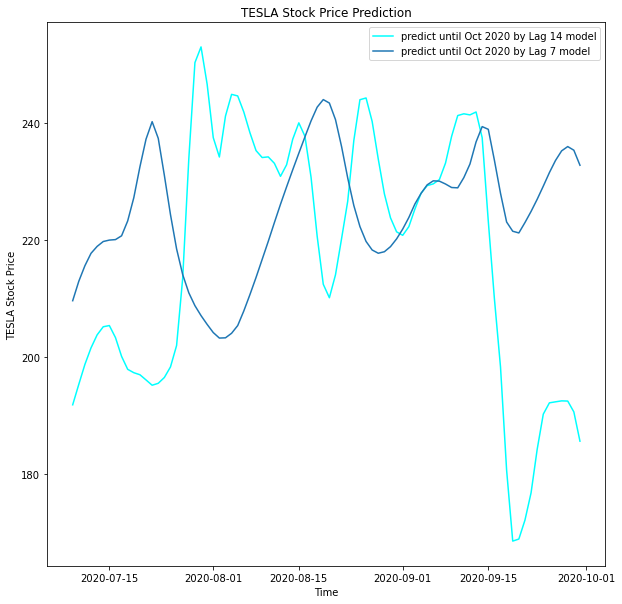

In [59]:
plt.plot(date,predict_value[0],color='cyan',label='predict until Oct 2020 by Lag 14 model')
plt.plot(date,predict_value2[0],label='predict until Oct 2020 by Lag 7 model')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()